# COVID-19 Time Series Analysis

This notebook explores the COVID-19 pandemic in South Korea through the lens of a data scientist. In South Korea, government agencies attempted to collect and track all data relevant to the pandemic. Data produced by these South Korean government agencies was gathered and structured by [Kaggle user "datartist"](https://www.kaggle.com/kimjihoo) and shared as a [Kaggle dataset](https://www.kaggle.com/kimjihoo/coronavirusdataset). 

The Kaggle dataset provides multiple data tables each with different, uniquely structured data. This notebook is only concerned with the [time series](https://en.wikipedia.org/wiki/Time_series) data tables Time.csv, TimeAge.csv, and TimeGender.csv. Time series data describes the relationship between time and a collection of dependent variables. Time series data is often used to forecast future events or analyze the impact of past events or holidays.

### The Data Set

The [Kaggle dataset](https://www.kaggle.com/kimjihoo/coronavirusdataset) this notebook focuses on is a sprawling network of many data points. As such, the dataset follows a strict structure to allow tables to be cross examined. The following figure visualizes the structure of the dataset:
![](https://user-images.githubusercontent.com/50820635/86225695-8dca0580-bbc5-11ea-9e9b-b0ca33414d8a.PNG)

This notebook is focused on the Time, TimeAge, and TimeGender data tables as they are the only time series data this dataset provides.

### Facebook Prophet

[Facebook Prophet](https://facebook.github.io/prophet/) is a python library that completely automates forecasting and provides hyperparameters that can be tuned by hand. 

In my experience, the library is extremely powerful and quick to implement. With only a few lines of code, our data table is loaded, filtered, renamed, and ready to be used to fit the Prophet model. The Prophet model can predict data for future dates as well as find effect of important events using data.

For the scope of this notebook, Facebook Prophet is utilized to visualize the time series data as well as create predictions for the future.

In [ ]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# A function to use Facebook Prophet to predict the next n periods and plot the forecast
def prophet(df, col, periods=50, name=None):
  ph = Prophet(yearly_seasonality=False, daily_seasonality=False)
  ph.fit(df[col])
  future = ph.make_future_dataframe(periods=periods)
  pred = ph.predict(future)
  fig = ph.plot(pred, xlabel='Date', ylabel=col)
  fig.gca().ticklabel_format(style='plain', axis='y')
  if not name is None: fig.gca().set_title(name)

### Time.csv

Table Columns:
* date - The stringified date
* time - The time during the date
* test - Number of COVID-19 tests
* negative - Number of Negative COVID-19 tests
* confirmed - Number of Confirmed COVID-19 cases
* released - Number of Released COVID-19 patients
* deceased - Number of Deceased COVID-19 patients

In [ ]:
# Load the time data frame
df_time = pd.read_csv('Time.csv')
df_time.dropna()
df_time_np = df_time.to_numpy()

# Add the ratio columns
df_time['negative-ratio'] = [df_time_np[i][3] / df_time_np[i][2] for i in range(df_time.shape[0])]
df_time['confirmed-ratio'] = [df_time_np[i][4] / df_time_np[i][2] for i in range(df_time.shape[0])]

# Print the data table
print(df_time.shape)
df_time.head()

(163, 9)


,date,time,test,negative,confirmed,released,deceased,negative-ratio,confirmed-ratio
0,2020-01-20,16,1,0,1,0,0,0.000000,1.000000
1,2020-01-21,16,1,0,1,0,0,0.000000,1.000000
2,2020-01-22,16,4,3,1,0,0,0.750000,0.250000
3,2020-01-23,16,22,21,1,0,0,0.954545,0.045455
4,2020-01-24,16,27,25,2,0,0,0.925926,0.074074


In [ ]:
df_time_np = df_time.to_numpy().transpose()

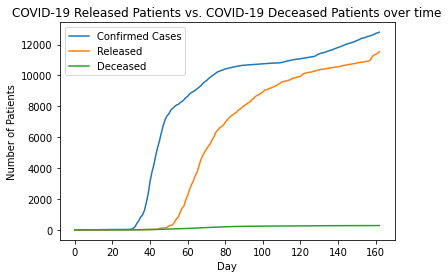

In [ ]:
plt.plot(df_time_np[4], label='Confirmed Cases')
plt.plot(df_time_np[5], label='Released')
plt.plot(df_time_np[6], label='Deceased')
plt.ticklabel_format(style='plain', axis='y')
plt.title('COVID-19 Released Patients vs. COVID-19 Deceased Patients over time')
plt.xlabel('Day')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [ ]:
# Create DataFrames for each dependent variable with appropriate labels
df_time_y = {}
for col in df_time.columns[2:]:
  df_time_y[col] = df_time[['date', col]].rename(columns={'date': 'ds', col: 'y'})

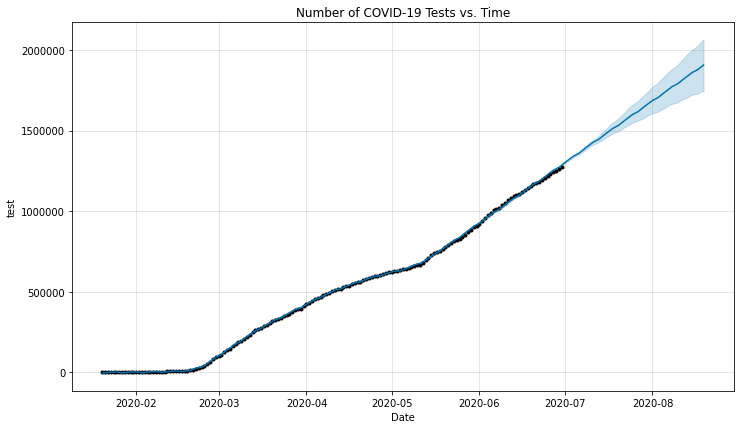

In [ ]:
prophet(df_time_y, 'test', name='Number of COVID-19 Tests vs. Time')

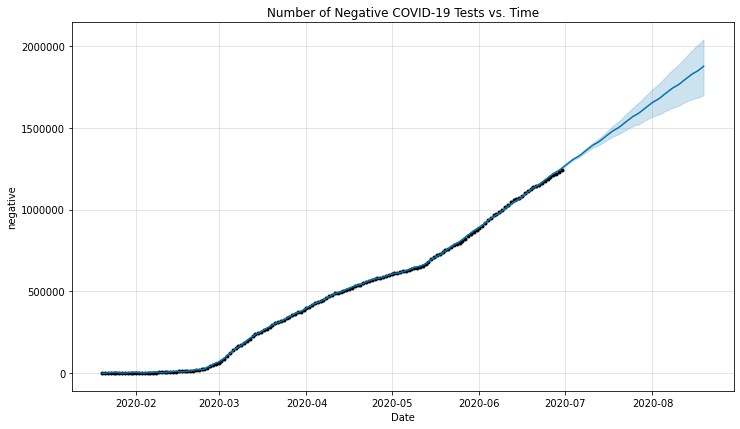

In [ ]:
prophet(df_time_y, 'negative', name='Number of Negative COVID-19 Tests vs. Time')

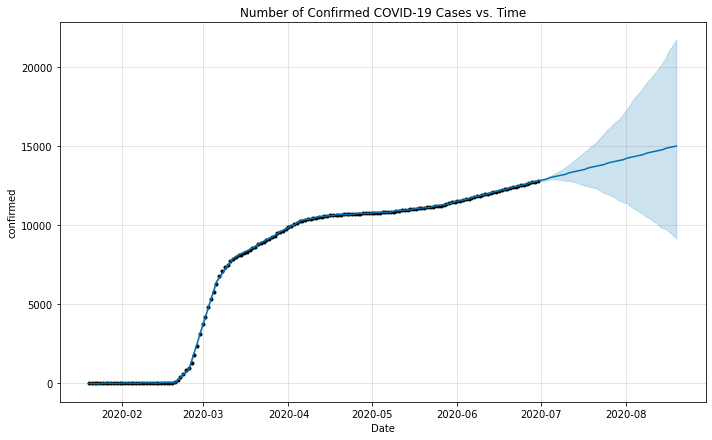

In [ ]:
prophet(df_time_y, 'confirmed', name='Number of Confirmed COVID-19 Cases vs. Time')

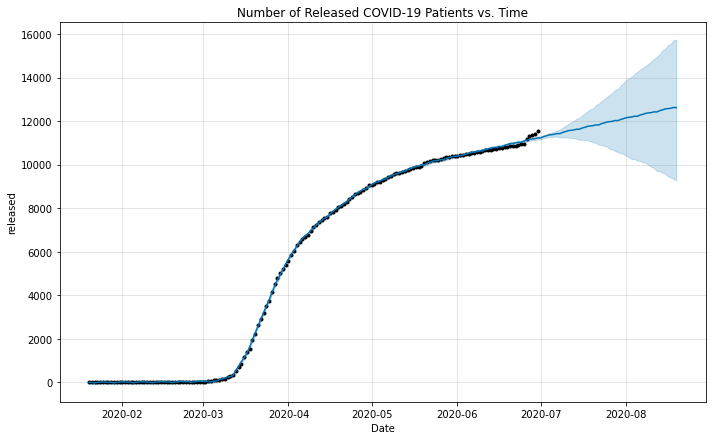

In [ ]:
prophet(df_time_y, 'released', name='Number of Released COVID-19 Patients vs. Time')

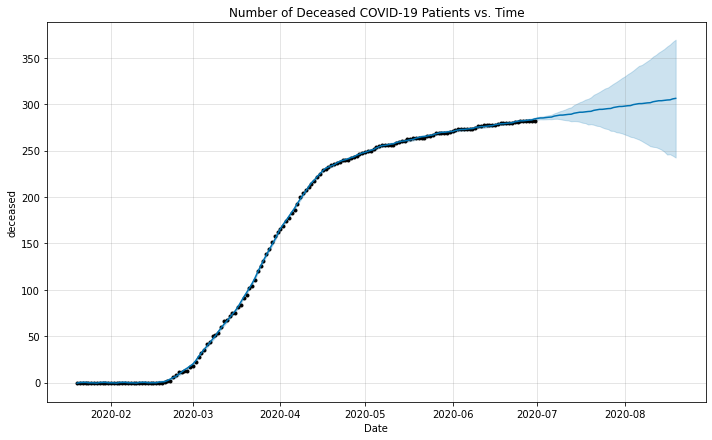

In [ ]:
prophet(df_time_y, 'deceased', name='Number of Deceased COVID-19 Patients vs. Time')

### TimeAge

Table Columns:
* date - The stringified date
* time - The time during the date
* age - The categorical age group (0s to 80s+)
* confirmed - The number of confirmed cases
* deceased - The number of deceased

In [ ]:
# Load the time data frame
df_time_age = pd.read_csv('TimeAge.csv')
df_time_age.dropna()

# Split data frame into age categories
ages = df_time_age['age'].unique()
print('Age Categories: {}'.format(ages))

# Calculate a data frame for each category
ages_df = {}
for age in ages:
  ages_df[age] = df_time_age.loc[df_time_age['age'] == age]
  print('{}\n'.format(ages_df[age].head()))

# Print the data table
print(df_time_age.shape)
df_time_age.head()

Age Categories: ['0s' '10s' '20s' '30s' '40s' '50s' '60s' '70s' '80s']
          date  time age  confirmed  deceased
0   2020-03-02     0  0s         32         0
9   2020-03-03     0  0s         34         0
18  2020-03-04     0  0s         34         0
27  2020-03-05     0  0s         38         0
36  2020-03-06     0  0s         45         0

          date  time  age  confirmed  deceased
1   2020-03-02     0  10s        169         0
10  2020-03-03     0  10s        204         0
19  2020-03-04     0  10s        233         0
28  2020-03-05     0  10s        257         0
37  2020-03-06     0  10s        292         0

          date  time  age  confirmed  deceased
2   2020-03-02     0  20s       1235         0
11  2020-03-03     0  20s       1417         0
20  2020-03-04     0  20s       1575         0
29  2020-03-05     0  20s       1727         0
38  2020-03-06     0  20s       1877         0

          date  time  age  confirmed  deceased
3   2020-03-02     0  30s        506   

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [ ]:
df_time_age_y = {}
for age in ages:
  df_time_age_y[age] = {}
  df_time_age_y[age]['confirmed'] = ages_df[age][['date', 'confirmed']].rename(columns={'date': 'ds', 'confirmed': 'y'})
  df_time_age_y[age]['deceased'] = ages_df[age][['date', 'deceased']].rename(columns={'date': 'ds', 'deceased': 'y'})

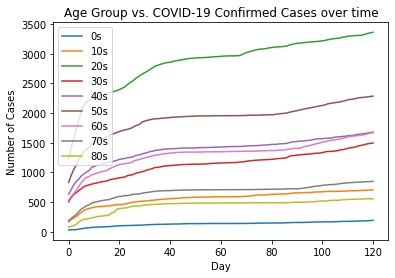

In [ ]:
for age in ages:
  plt.plot(ages_df[age].to_numpy().transpose()[3], label=age)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Age Group vs. COVID-19 Confirmed Cases over time')
plt.xlabel('Day')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

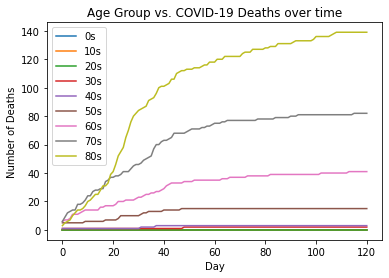

In [ ]:
for age in ages:
  plt.plot(ages_df[age].to_numpy().transpose()[4], label=age)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Age Group vs. COVID-19 Deaths over time')
plt.xlabel('Day')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

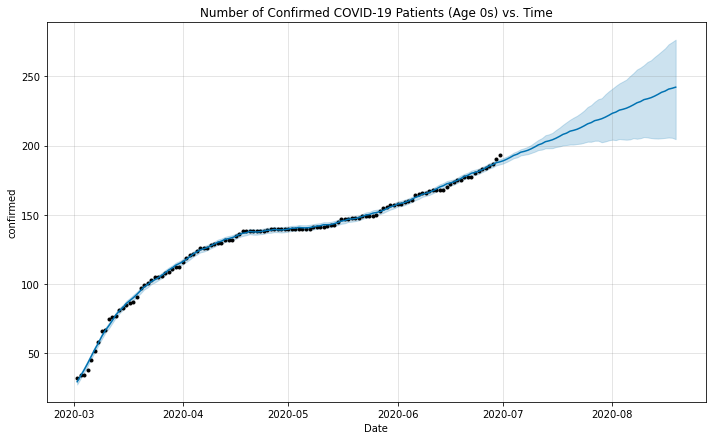

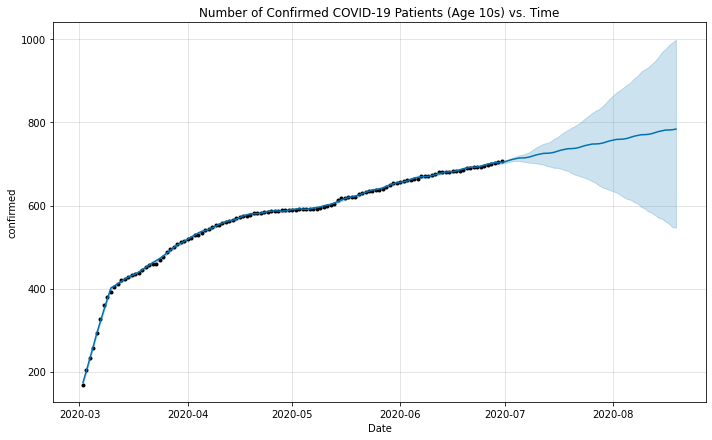

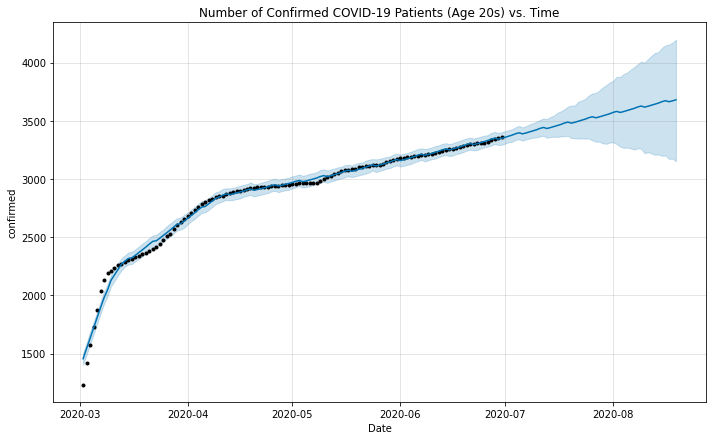

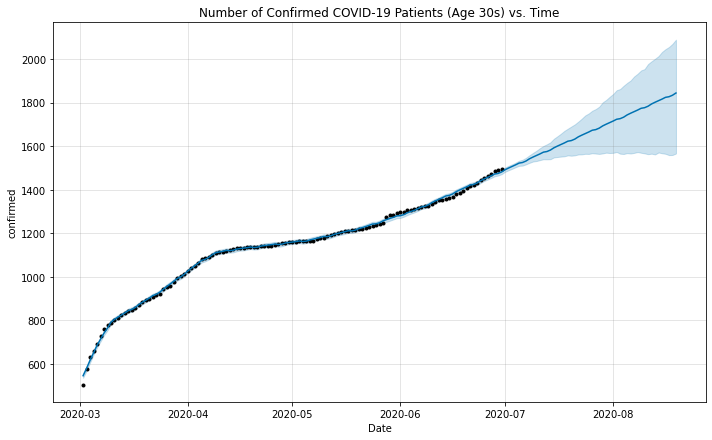

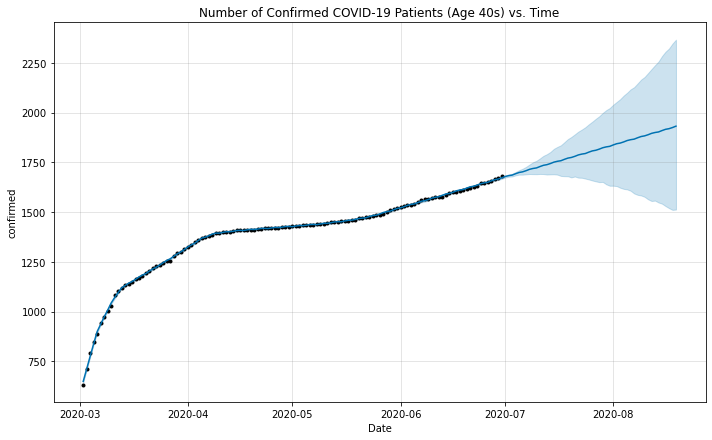

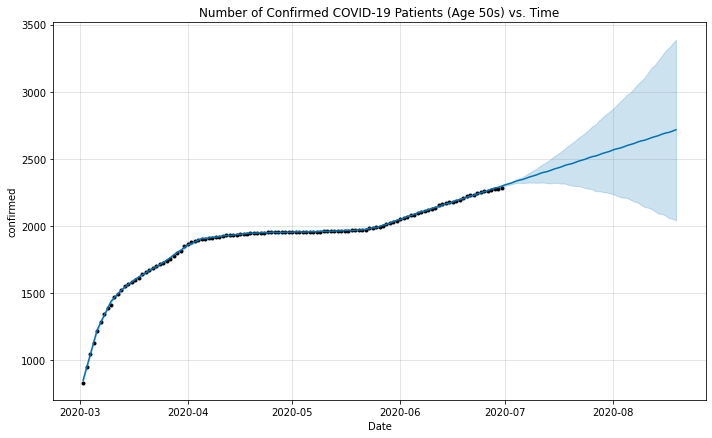

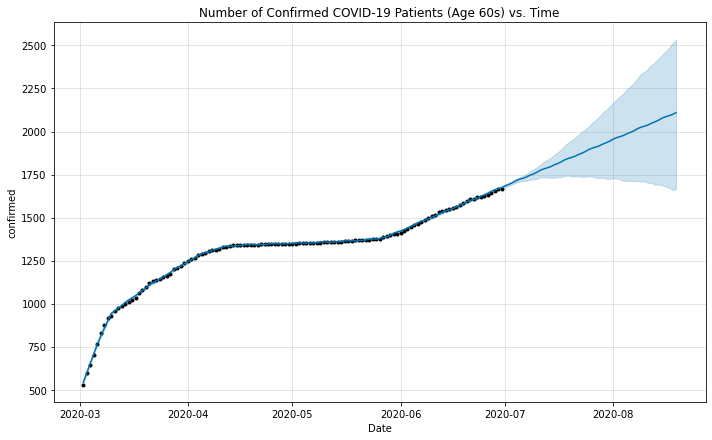

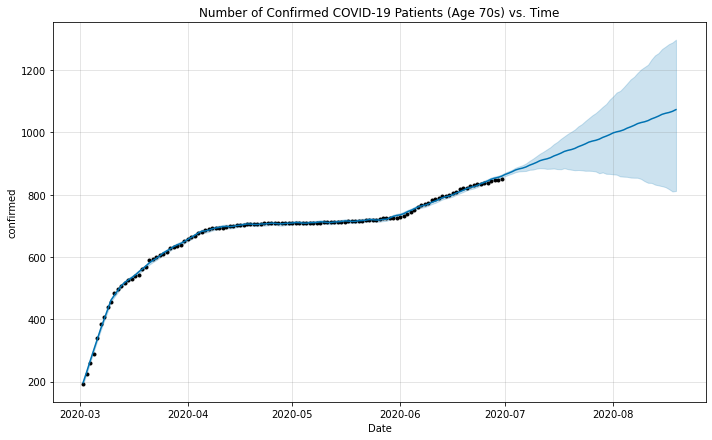

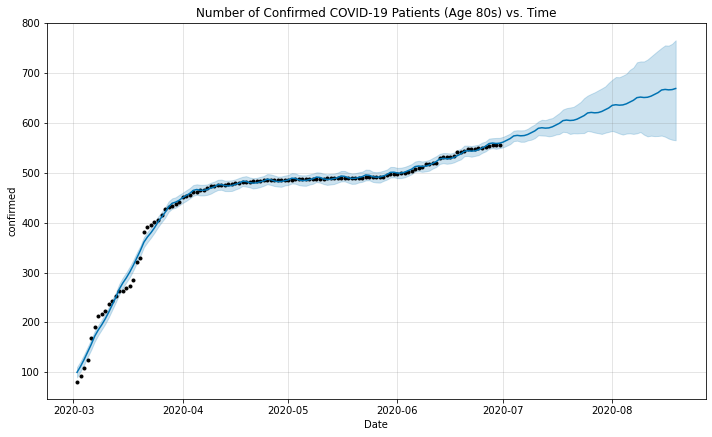

In [ ]:
for age in ages:
  prophet(df_time_age_y[age], 'confirmed', name='Number of Confirmed COVID-19 Patients (Age {}) vs. Time'.format(age))

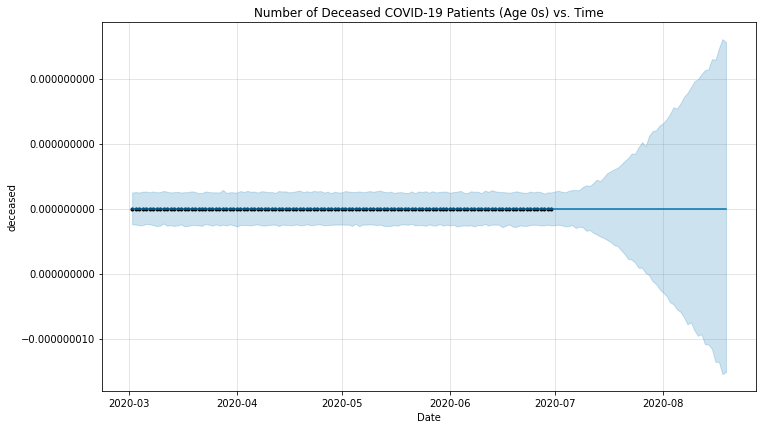

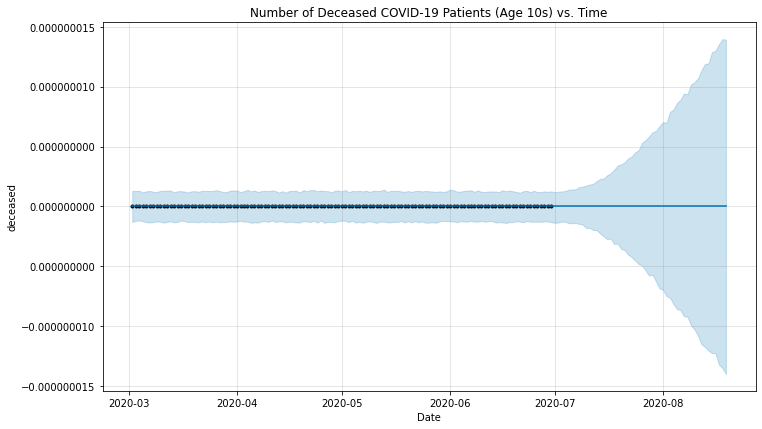

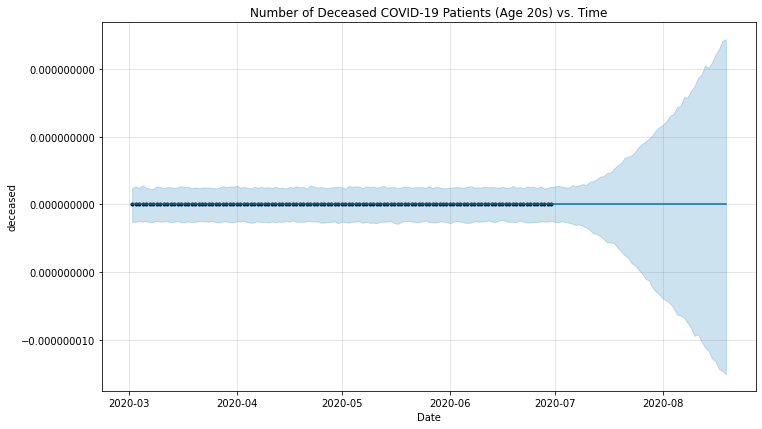

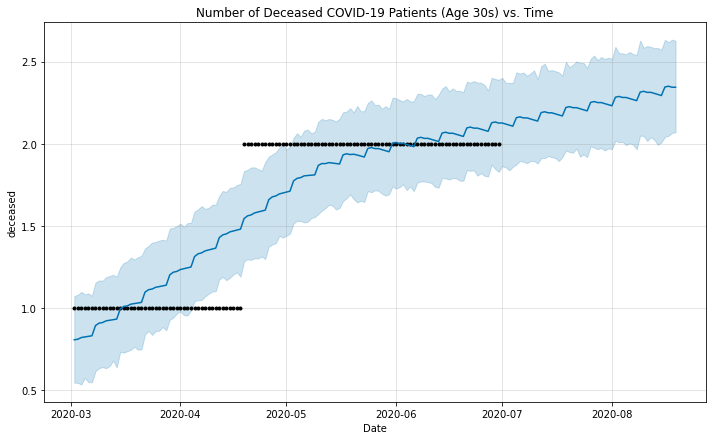

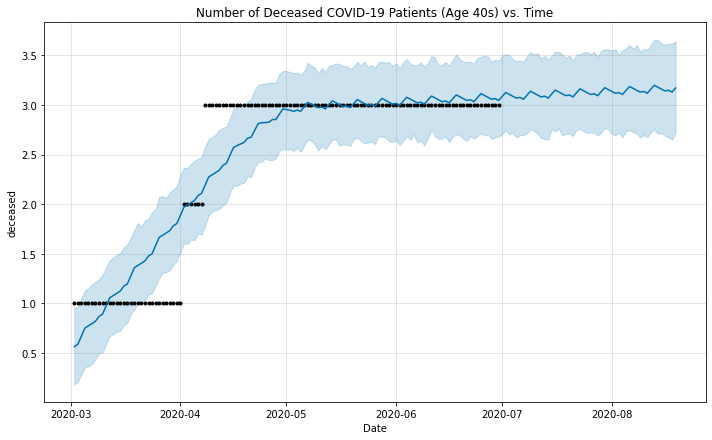

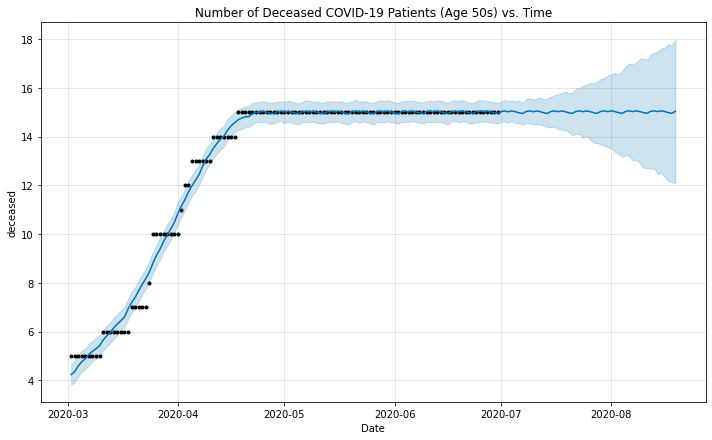

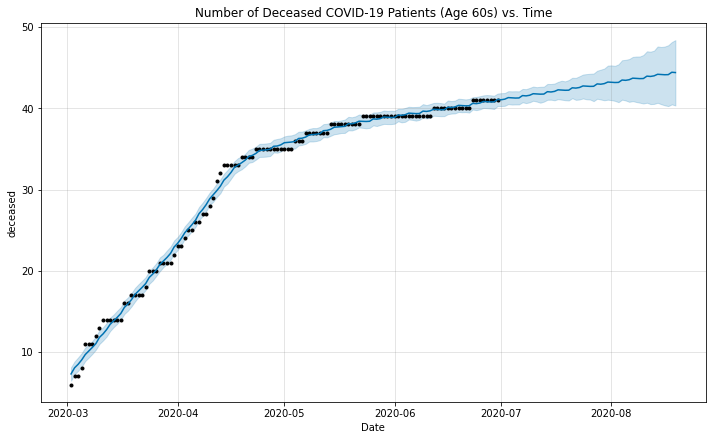

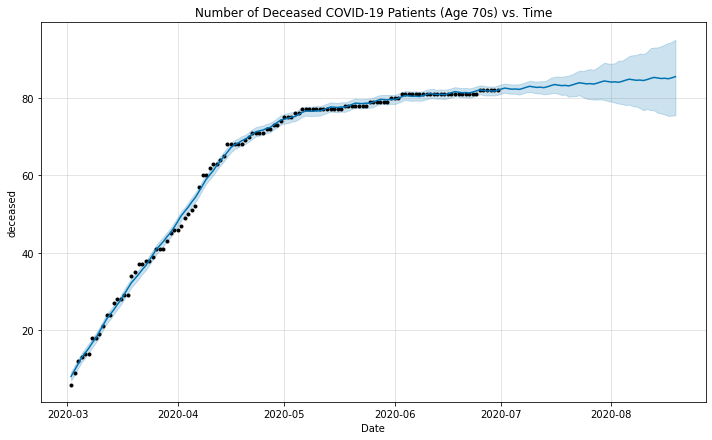

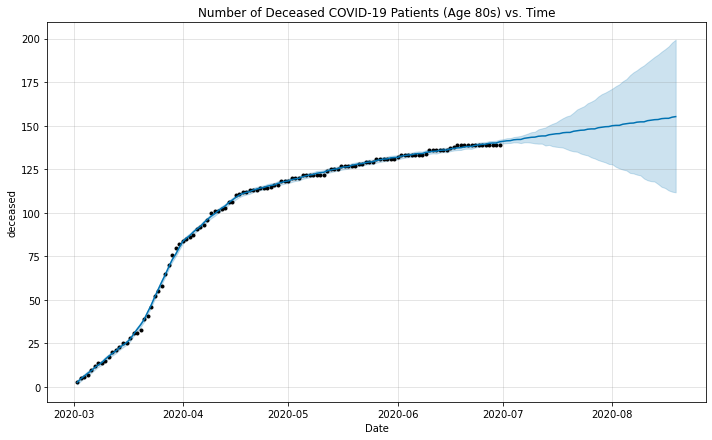

In [ ]:
for age in ages:
  prophet(df_time_age_y[age], 'deceased', name='Number of Deceased COVID-19 Patients (Age {}) vs. Time'.format(age))

### TimeGender

Table Columns:
* date - The stringified date
* time - The time during the date
* sex - The categorical gender
* confirmed - The number of confirmed cases
* deceased - The number of deceased patients

In [ ]:
# Load the time data frame
df_time_gender = pd.read_csv('TimeGender.csv')
df_time_gender.dropna()

# Split data frame into age categories
genders = df_time_gender['sex'].unique()
print('Sex Categories: {}'.format(genders))

# Calculate a data frame for each gender
genders_df = {}
for g in genders:
  genders_df[g] = df_time_gender.loc[df_time_gender['sex'] == g]
  print('{}\n'.format(genders_df[g].head()))

# Print the data table
print(df_time_gender.shape)
df_time_gender.head()

Sex Categories: ['male' 'female']
         date  time   sex  confirmed  deceased
0  2020-03-02     0  male       1591        13
2  2020-03-03     0  male       1810        16
4  2020-03-04     0  male       1996        20
6  2020-03-05     0  male       2149        21
8  2020-03-06     0  male       2345        25

         date  time     sex  confirmed  deceased
1  2020-03-02     0  female       2621         9
3  2020-03-03     0  female       3002        12
5  2020-03-04     0  female       3332        12
7  2020-03-05     0  female       3617        14
9  2020-03-06     0  female       3939        17

(242, 5)


,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [ ]:
df_time_gender_y = {}
for g in genders:
  df_time_gender_y[g] = {}
  df_time_gender_y[g]['confirmed'] = genders_df[g][['date', 'confirmed']].rename(columns={'date': 'ds', 'confirmed': 'y'})
  df_time_gender_y[g]['deceased'] = genders_df[g][['date', 'deceased']].rename(columns={'date': 'ds', 'deceased': 'y'})

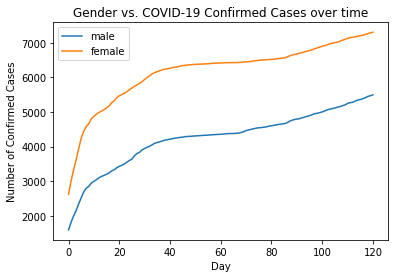

In [ ]:
for g in genders:
  plt.plot(genders_df[g].to_numpy().transpose()[3], label=g)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Gender vs. COVID-19 Confirmed Cases over time')
plt.xlabel('Day')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.show()

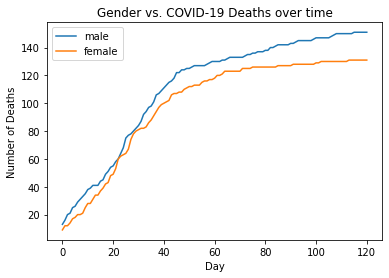

In [ ]:
for g in genders:
  plt.plot(genders_df[g].to_numpy().transpose()[4], label=g)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Gender vs. COVID-19 Deaths over time')
plt.xlabel('Day')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

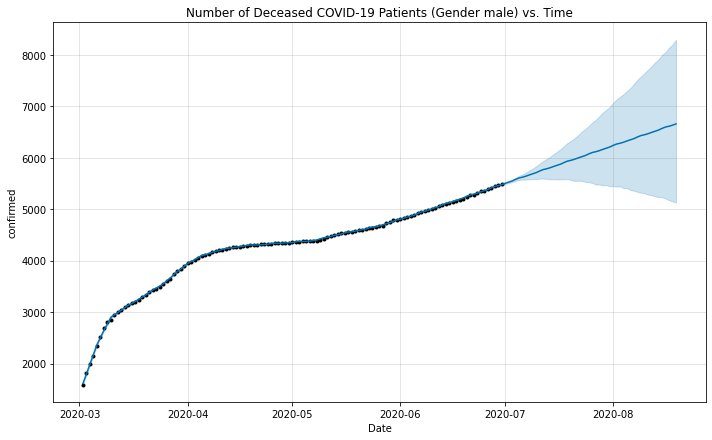

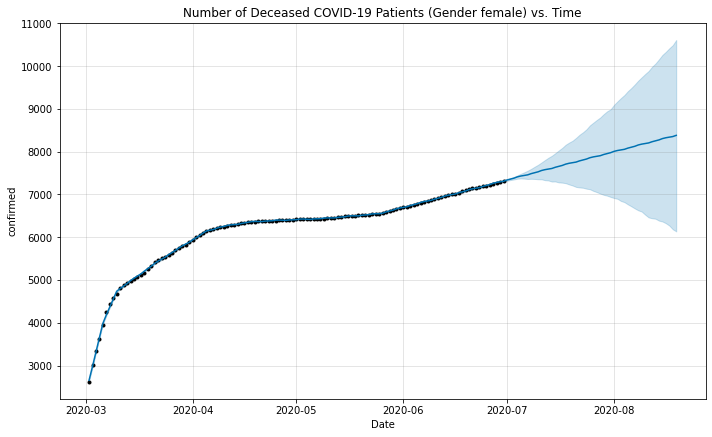

In [ ]:
for g in genders:
  prophet(df_time_gender_y[g], 'confirmed', name='Number of Deceased COVID-19 Patients (Gender {}) vs. Time'.format(g))

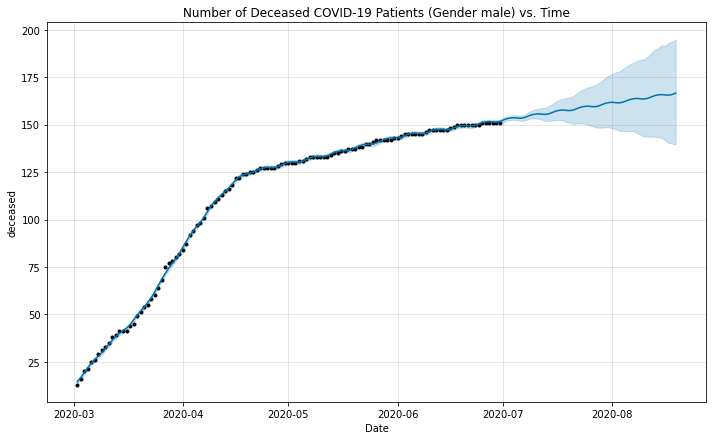

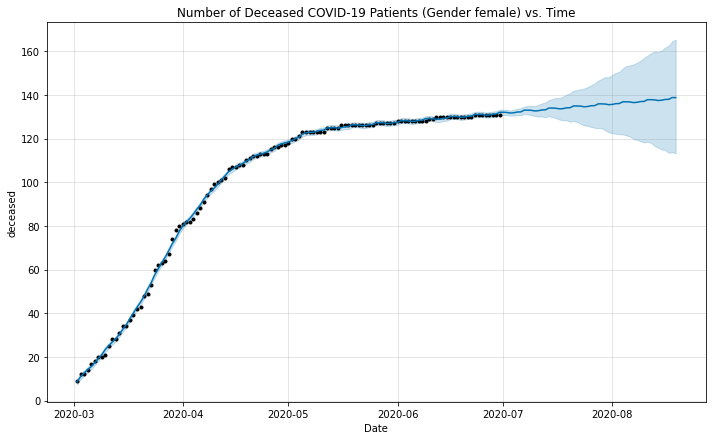

In [ ]:
for g in genders:
  prophet(df_time_gender_y[g], 'deceased', name='Number of Deceased COVID-19 Patients (Gender {}) vs. Time'.format(g))

# To do? What's Next?

* Loading South Korean holidays and significant events from March 2020 to July 2020 as FB Prophet hyperparameters
* Naive Bayesian classification using all data, not just time series